In [ ]:
#讀入CSV
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('diabetes-1.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#刪除不要的資料
df1=df.drop('Pregnancies',axis=1)
df2=df1.drop('Glucose',axis=1)
df3=df2.drop('BloodPressure',axis=1)
df4=df3.drop('SkinThickness',axis=1)
df5=df4.drop('Insulin',axis=1)
df6=df5.drop('Age',axis=1)
df6

,BMI,DiabetesPedigreeFunction,Outcome
0,33.6,0.627,1
1,26.6,0.351,0
2,23.3,0.672,1
3,28.1,0.167,0
4,43.1,2.288,1
...,...,...,...
763,32.9,0.171,0
764,36.8,0.340,0
765,26.2,0.245,0
766,30.1,0.349,1


In [ ]:
display(df6.describe())

,BMI,DiabetesPedigreeFunction,Outcome
count,768.000000,768.000000,768.000000
mean,31.992578,0.471876,0.348958
std,7.884160,0.331329,0.476951
min,0.000000,0.078000,0.000000
25%,27.300000,0.243750,0.000000
50%,32.000000,0.372500,0.000000
75%,36.600000,0.626250,1.000000
max,67.100000,2.420000,1.000000


In [ ]:
#刪除BMI等於0的部分
df6_index=df6[df6["BMI"]<=0].index
df7=df6.drop(df6_index)
display(df7.describe())

,BMI,DiabetesPedigreeFunction,Outcome
count,757.000000,757.000000,757.000000
mean,32.457464,0.472437,0.351387
std,6.924988,0.329474,0.477719
min,18.200000,0.078000,0.000000
25%,27.500000,0.244000,0.000000
50%,32.300000,0.376000,0.000000
75%,36.600000,0.627000,1.000000
max,67.100000,2.420000,1.000000


In [ ]:
#刪除BMI等於或是超過42的部分還有DiabetesPedigreeFunction大於1的部分
df7_index=df7[df7["BMI"]>=42].index
df8=df7.drop(df7_index)
df8_index=df8[df8["DiabetesPedigreeFunction"]>=1].index
df9=df8.drop(df8_index)
display(df9.describe())

,BMI,DiabetesPedigreeFunction,Outcome
count,643.000000,643.000000,643.000000
mean,30.895956,0.406810,0.306376
std,5.386656,0.221855,0.461347
min,18.200000,0.078000,0.000000
25%,26.750000,0.236000,0.000000
50%,31.200000,0.343000,0.000000
75%,34.900000,0.558000,1.000000
max,41.800000,0.997000,1.000000


In [ ]:
#判斷BMI落在什麼區間上
df9['BMIRANGE'] = 0
for idx, row in df9.iterrows():  
    BMI = row['BMI']
    if BMI < 18.5:
        BMI_RANGE = '體重過輕'
    elif 18.5 <= BMI < 24.0:
        BMI_RANGE = '正常範圍'
    elif 24.0 <= BMI < 27.0:
        BMI_RANGE = '體重過重'
    elif 27.0 <= BMI < 30.0: 
        BMI_RANGE = '輕度肥胖'
    elif 30.0 <= BMI < 35.0:
        BMI_RANGE = '中度肥胖'
    else:
        BMI_RANGE = '重度肥胖'
    df9.loc[idx, 'BMIRANGE'] = BMI_RANGE
    df9.loc[idx, 'BMIRANGE2'] = 1
df9

,BMI,DiabetesPedigreeFunction,Outcome,BMIRANGE,BMIRANGE2
0,33.6,0.627,1,中度肥胖,1.0
1,26.6,0.351,0,體重過重,1.0
2,23.3,0.672,1,正常範圍,1.0
3,28.1,0.167,0,輕度肥胖,1.0
5,25.6,0.201,0,體重過重,1.0
...,...,...,...,...,...
763,32.9,0.171,0,中度肥胖,1.0
764,36.8,0.340,0,重度肥胖,1.0
765,26.2,0.245,0,體重過重,1.0
766,30.1,0.349,1,中度肥胖,1.0


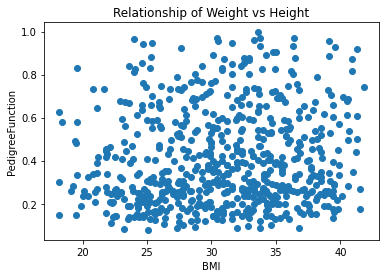

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(df9.BMI,df9.DiabetesPedigreeFunction, 'o')         #繪製散佈圖
plt.title('Relationship of Weight vs Height')          #設定圖形標題
plt.xlabel('BMI')                          #設定X軸標籤
plt.ylabel('PedigreeFunction')                    #設定Y軸標籤
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32933 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32982 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37325 missing from current font.
  font.set_

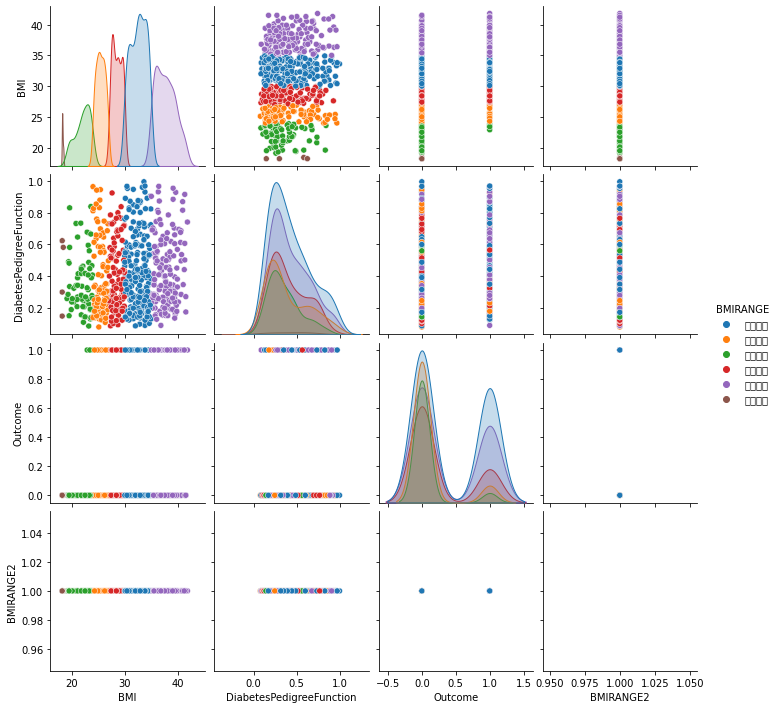

In [ ]:
import seaborn as sns
sns.pairplot(df9,hue="BMIRANGE")
plt.show()

In [ ]:
#各區間罹患糖尿病的人數
q=0
z=0
w=0
x=0
y=0
k=0
a=0
b=0
c=0
d=0
e=0
f=0
for idx, row in df9.iterrows():  
    Outcome = row['Outcome']
    BMI = row['BMI']
    if  (BMI<18.5):
     a=a+1
    elif  (BMI>=18.5 and BMI<24):
     b=b+1
    elif (BMI>=24)and(BMI<27):
     c=c+1
    elif (BMI>=27)and(BMI<30):
     d=d+1
    elif  BMI>=30 and BMI<35:
     e=e+1 
    elif   BMI>=35:
     f=f+1

for idx, row in df9.iterrows():  
    Outcome = row['Outcome']
    BMI = row['BMI']
    if (Outcome==1)and (BMI<18.5):
     q=q+1
    elif Outcome==1 and (BMI>=18.5 and BMI<24):
     z=z+1
    elif (Outcome==1)and(BMI>=24)and(BMI<27):
     w=w+1
    elif (Outcome==1)and(BMI>=27)and(BMI<30):
     x=x+1
    elif Outcome==1 and BMI>=30 and BMI<35:
     y=y+1 
    elif Outcome==1 and BMI>=35:
     k=k+1
print(a,q)
print(b,z)
print(c,w)
print(d,x)
print(e,y)
print(f,k)     

4 0
69 5
93 10
105 27
212 91
160 64
